In [213]:
# Read and clean data

# Read and clean data

In [245]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from helpers import make_aesthetic, array_stats

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mypal = make_aesthetic()



def clean_shallow_deep(x):
    # because scale is -2, -1, 0, 1, 2 and qualtrics is 1, 2, 3, 4, 5
    # So this function turns metric into -2 to 2 in direction of <deep --> shallow> 

    if pd.isna(x):
        return None 
    return (int(x) - 3) * -1

def clean_general(x):
    # Take first character
    if pd.isna(x):
        return None
    return int(x[0])

def clean_even(x):
    # qualtrics is coding as 1, 2, 3, 4, 5
    # semantic scale was # (normalize to -2, -1, 0, 1, 2)
    # where 0 meant both equal. 
    # So we want to penalize large deviations from 0 
    if pd.isna(x):
        return None
    x2 = int(x) - 3 # (normalize to -2, -1, 0, 1, 2)
    if x2 in [-2, 2]:
        return 1
    elif x2 in [-1, 1]:
        return 2
    elif x2 == 0:
        return 3

df = pd.read_csv('data/raw/deep_shallow_2025-04-13_April132025_17.22.csv')
df = df.iloc[2:]

data = []
for idx, row in df.iterrows():
    
    # participant data
    duration = row['Duration (in seconds)']
    pid = row['pid']
    deep_shallow_1 = row['deep_shallow_1']
    deep_shallow_2 = row['deep_shallow_2']
    educ = row['educ']
    income = row['income']
    gender = row['gender']
    age = row['Age']
    ai_usage = row['ai_usage']
    con = row['con']
    
    participant_data = {
        "duration": duration,
        "pid": pid,
        "deep_shallow_1": deep_shallow_1,
        "deep_shallow_2": deep_shallow_2,
        "educ": educ,
        "income": income,
        "gender": gender, 
        "age": age,
        "ai_usage": ai_usage,
        "con": con
    }
    
    llm_shallow_cols = [x for x in df.columns if "lm_shallow_" in x]
    for col in llm_shallow_cols:
        data_pt = {
            "raw_col": col,
            "metric": "deep_shallow",
            "loop_merge": int(col.split("_")[0]),
            "answer_raw": row[col],
            "answer": clean_shallow_deep(row[col]),
        }
        data_pt.update(participant_data)
        data.append(data_pt)
        
    llm_general_cols = [x for x in df.columns if "lm_general" in x]
    for col in llm_general_cols:
        data_pt = {
            "raw_col": col,
            "metric": "general",
            "loop_merge": int(col.split("_")[0]),
            "answer_raw": row[col],
            "answer": clean_general(row[col]),
        }

        data_pt.update(participant_data)
        data.append(data_pt)
    llm_split_cols = [x for x in df.columns if "lm_split" in x]
    for col in llm_split_cols:
        data_pt = {
            "raw_col": col,
            "metric": "even",
            "loop_merge": int(col.split("_")[0]),
            "answer_raw": row[col],
            "answer": clean_even(row[col]),
        }
        data_pt.update(participant_data)
        data.append(data_pt)
    
    
df = pd.DataFrame(data)
df = df.dropna(subset=['answer'])
meta_df = pd.read_csv('data/clean/qualtrics_loop_merge_deep_shallow.csv')
df = pd.merge(df, meta_df, how='left', left_on=['loop_merge'], right_on=['idx'])
df['name'] = df['name1'] + "/" + df['name2']


    
dfs = {}
dfs['deep_shallow'] = df[df['metric'] == 'deep_shallow']
dfs['general'] = df[df['metric'] == 'general']
dfs['even'] = df[df['metric'] == 'even']
    

In [216]:
meta_df

,name,name1,name1_def,name2,name2_def,set,idx
0,Adaptability,Adaptive,Preferring AI agents adjust their behavior bas...,Static,Preferring AI agents maintain consistent behav...,shallow,1
1,Autonomy,Autonomous,Preferring AI agents that operate independentl...,Controlled,Preferring AI agents that require user guidanc...,shallow,2
2,Complexity,Simple,Preferring AI interactions that are straightfo...,Complex,Preferring AI interactions that are intricate ...,shallow,3
3,Conciseness,Concise,Preferring AI responses that are brief and to ...,Detailed,Preferring AI responses that are thorough and ...,shallow,4
4,Content Type,Factual,Preferring AI interactions that focus on factu...,Opinionated,Preferring AI interactions that include opinio...,shallow,5
5,Data Usage,Data Minimal,Preferring AI that uses minimal personal data.,Data Maximal,Preferring AI that uses extensive personal dat...,shallow,6
6,Decision-Making,Decisive,Preferring AI that makes quick decisions.,Deliberative,Preferring AI that takes time to consider opti...,shallow,7
7,Emotional Tone,Empathetic,Preferring AI interactions that are sensitive ...,Neutral,Preferring AI interactions that are emotionall...,shallow,8
8,Engagement Level,High Engagement,Preferring AI interactions that are interactiv...,Low Engagement,Preferring AI interactions that are straightfo...,shallow,9
9,Error Handling,Forgiving,Preferring AI systems that are lenient and tol...,Strict,Preferring AI systems that enforce rules and r...,shallow,10


# Shallowness: Preferences vs values 

## Plot and descriptives

/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_11791/4035878126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['deep_shallow']['clean_set'] = dfs['deep_shallow']['set'].replace({'shallow': 'Shallow\nPreferences', 'deep': 'Deep\nValues'})
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_11791/4035878126.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(data=dfs['deep_shallow'], x='clean_set', y='answer', palette=mypal)
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_11791/4035878126.py:2: UserWarning: The palette list has more values (15) than needed (2)

Deep value stats
M = -0.68, SD = 1.11, Mdn = -1.00
Mode = -1.00
95% CI [-1.00, -0.32]
Shallow preference stats
M = 0.10, SD = 1.36, Mdn = 1.00
Mode = 1.00
95% CI [-0.25, 0.43]
cohens d 0.6042109157846365
cles 0.661947661947662


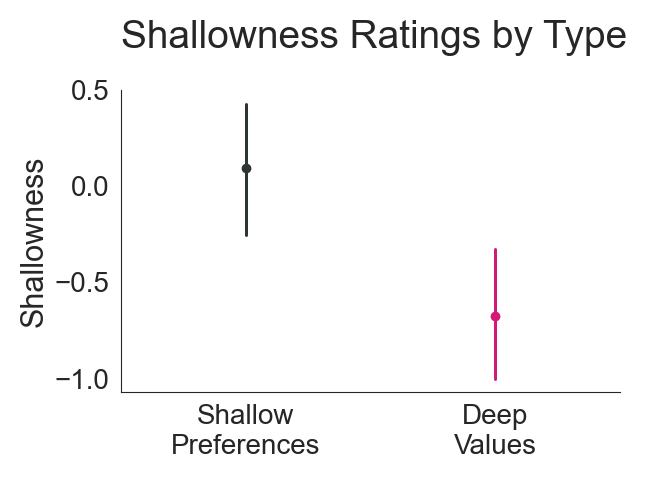

In [278]:
dfs['deep_shallow']['clean_set'] = dfs['deep_shallow']['set'].replace({'shallow': 'Shallow\nPreferences', 'deep': 'Deep\nValues'})
sns.pointplot(data=dfs['deep_shallow'], x='clean_set', y='answer', palette=mypal)

plt.title("Shallowness Ratings by Type")
plt.xlabel("")
plt.ylabel("Shallowness")

deep_value_ratings = dfs['deep_shallow'].query('set == "deep"')['answer'].values
shallow_pref_ratings = dfs['deep_shallow'].query('set == "shallow"')['answer'].values

print("Deep value stats")
array_stats(deep_value_ratings, include_ci=True)

print("Shallow preference stats")
array_stats(shallow_pref_ratings, include_ci=True)

from pingouin import compute_effsize

print("cohens d", compute_effsize(shallow_pref_ratings, deep_value_ratings, paired=False, eftype='cohen'))
print("cles", compute_effsize(shallow_pref_ratings, deep_value_ratings, paired=False, eftype='cles'))




import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM



In [243]:
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM

tdf = dfs['deep_shallow']
tdf['group'] = 1
tdf['z_answer'] = (tdf['answer'] - tdf['answer'].mean()) / tdf['answer'].std()

# statsmodels syntax from here (https://stackoverflow.com/questions/78525102/crossed-random-effects-in-python-with-statsmodels)
model = MixedLM.from_formula('z_answer ~ set', groups='group', data=tdf, 
                             vc_formula={'id1': "0 + C(name)",
                                         'id2': "0 + C(pid)"})
res = model.fit(reml=True)
print(res.summary())

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: z_answer 
No. Observations:   100     Method:             REML     
No. Groups:         1       Scale:              0.5722   
Min. group size:    100     Log-Likelihood:     -134.7063
Max. group size:    100     Converged:          Yes      
Mean group size:    100.0                                
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept      -0.398    0.237 -1.681 0.093 -0.863  0.066
set[T.shallow]  0.598    0.233  2.573 0.010  0.142  1.054
id1 Var         0.296    0.231                           
id2 Var         0.108    0.142                           


/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_11791/373954791.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['group'] = 1
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_11791/373954791.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['z_answer'] = (tdf['answer'] - tdf['answer'].mean()) / tdf['answer'].std()


# Plot by index

/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_11791/1378908795.py:60: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


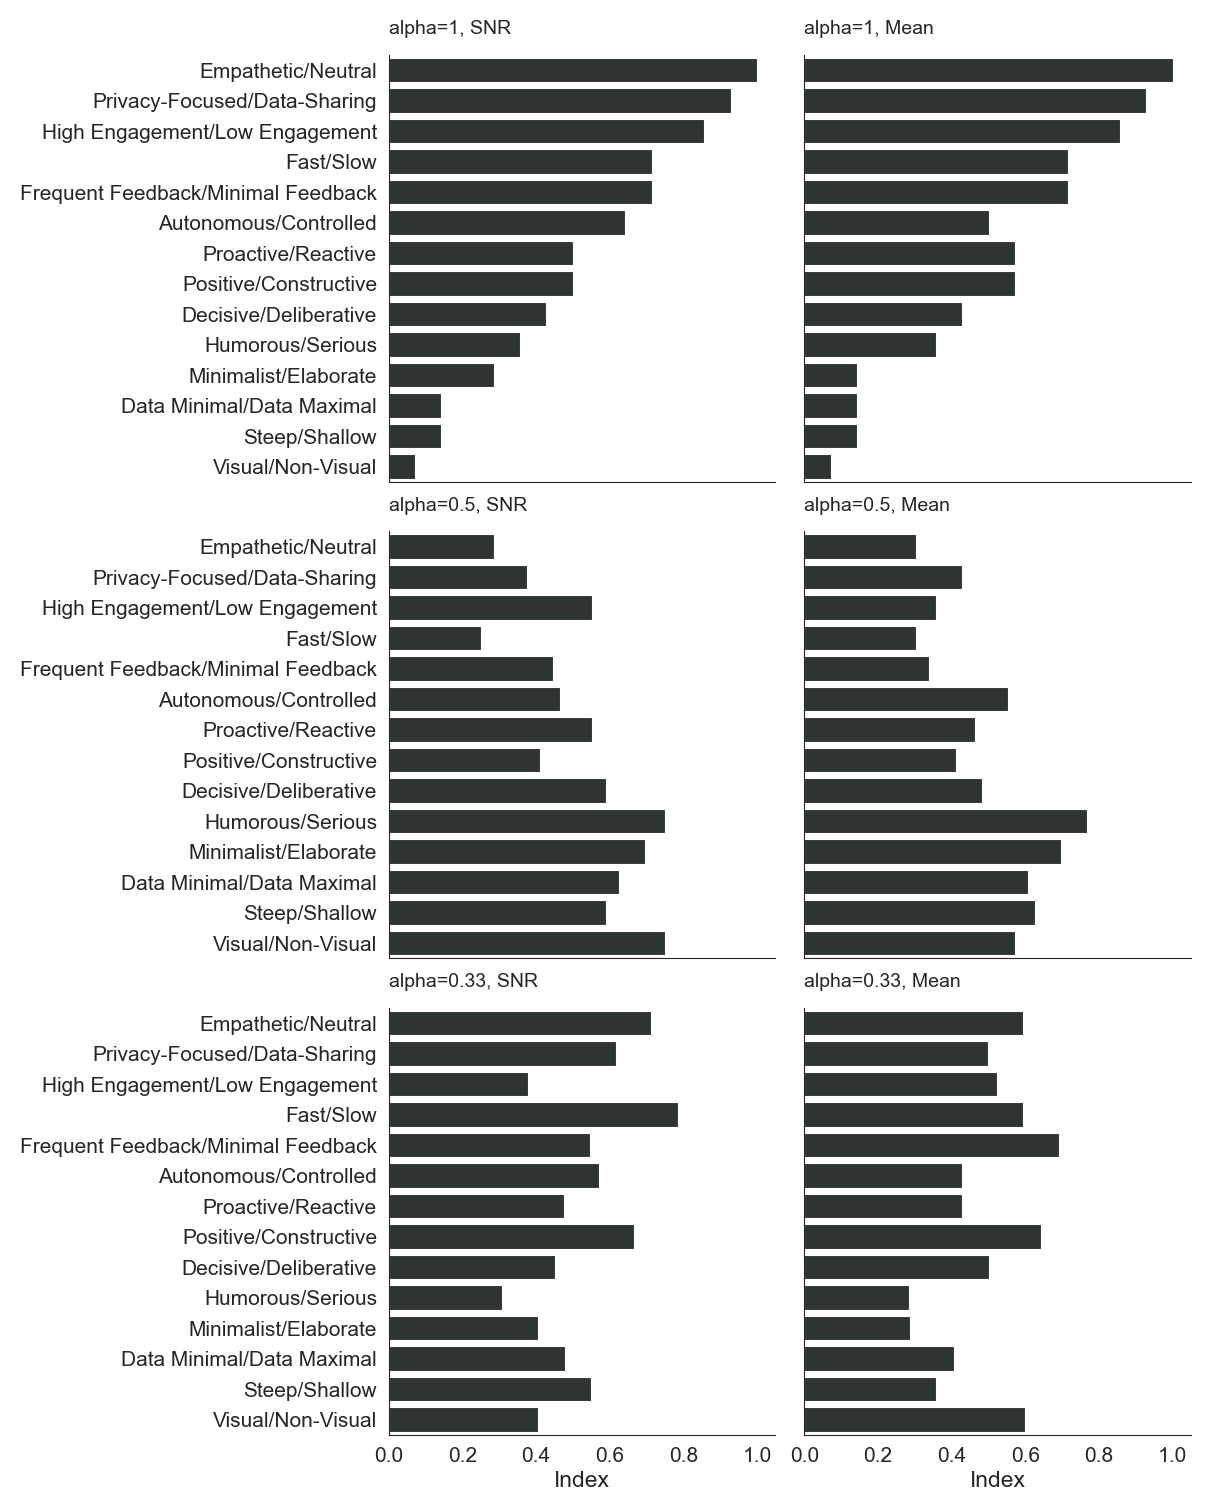

In [275]:

# Get data
########################
########################
shallow = df.query("set == 'shallow'")



d = shallow.query("metric == 'deep_shallow'").groupby('name').agg({'answer': ['mean', 'std']}).dropna()
d.columns = ['mean_deep_shallow', 'std_deep_shallow']
d['snr_deep_shallow'] = d['mean_deep_shallow'] / (d['std_deep_shallow']+0.001)

d2 = shallow.query("metric == 'general'").groupby('name').agg({'answer': ['mean', 'std']}).dropna()
d2.columns = ['mean_general', 'std_general']
d2['snr_general'] = d2['mean_general'] / (d2['std_general'] + 0.001)

d3 = shallow.query("metric == 'even'").groupby('name').agg({'answer': ['mean', 'std']}).dropna()
d3.columns = ['mean_even', 'std_even']
d3['snr_even'] = d3['mean_even'] / (d3['std_even'] + 0.001)

d = pd.concat([d, d2, d3], axis=1)
d.dropna(subset=['snr_deep_shallow', 'snr_general', 'snr_even'], inplace=True)




# Plot
########################
########################
make_aesthetic(font_scale=1.5)
alphas = [1, 0.5, 0.33]
use_snr_values = [True, False]

fig, axes = plt.subplots(len(alphas), len(use_snr_values), figsize=(12, 15), sharex=True, sharey=True)

for i, alpha in enumerate(alphas):
    for j, use_snr in enumerate(use_snr_values):
        plt.sca(axes[i, j])  
        if not use_snr:
            rel_cols = ['mean_deep_shallow', 'mean_general', 'mean_even']
        else:
            rel_cols = ['snr_deep_shallow', 'snr_general', 'snr_even']

        for col in rel_cols:
            d[col] = d[col].rank(ascending=False, method='min', pct=True)

        other_alphas = (1 - alpha) / 2
        d['indx'] = alpha * d[rel_cols[0]] + other_alphas * d[rel_cols[1]] + other_alphas * d[rel_cols[2]]

        # Get top and bottom items
        top = d.nlargest(50, 'indx')
        bottom = d.nsmallest(50, 'indx')
        extreme = pd.concat([top, bottom])
        
        make_aesthetic(font_scale=1)
        sns.barplot(data=extreme, y='name', x='indx', ax=axes[i, j])
        axes[i, j].set_title(f"alpha={alpha}, {'SNR' if use_snr else 'Mean'}")
        axes[i, j].set_xlabel("Index")
        axes[i, j].set_ylabel("")

plt.tight_layout()
plt.show()



## General desc stats

/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_11791/3369558226.py:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


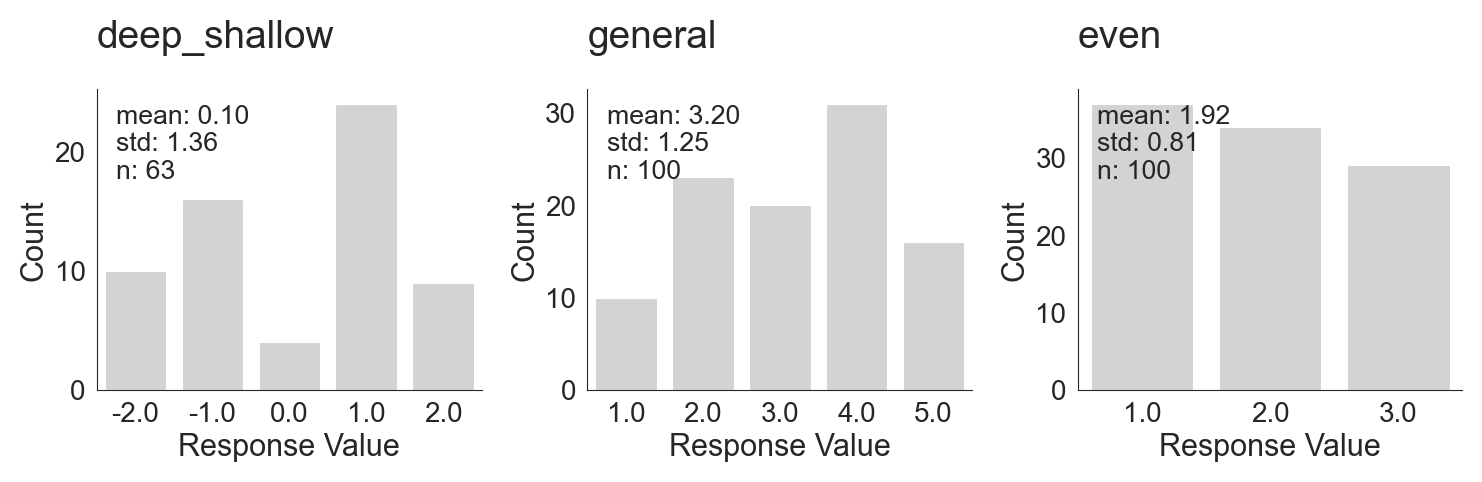

In [276]:
make_aesthetic(font_scale=2)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
metrics = df['metric'].unique()

for i, metric in enumerate(metrics):
    metric_data = shallow[shallow['metric'] == metric]
    
    value_counts = metric_data['answer'].value_counts().sort_index()
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], color='lightgray')
    
    stats = metric_data['answer'].describe()
    stats_text = f"mean: {stats['mean']:.2f}\nstd: {stats['std']:.2f}\nn: {stats['count']:.0f}"
    axes[i].text(0.05, 0.95, stats_text, transform=axes[i].transAxes,
                verticalalignment='top')
    
    axes[i].set_title(metric)
    axes[i].set_xlabel('Response Value')
    axes[i].set_ylabel('Count')

plt.tight_layout()